# Confidence Interval of Median: Spread

This example shows how the spread of confidence interval of median changes with respect number of samples and confidence levels.

Text(0.5, 1.0, 'Spread of confidence interval indices of median')

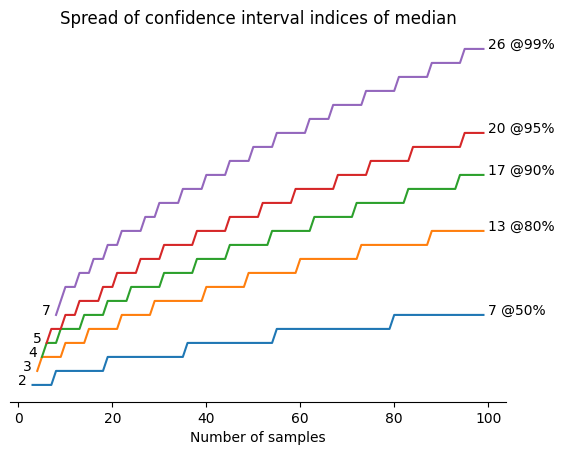

In [2]:
import matplotlib.pyplot as plt
from relistats.quantile import quantile_interval_places

confidence_levels = (50, 80, 90, 95, 99)

x_ax = range(3, 100)

ax = plt.subplot(111)

for c in confidence_levels:
    ci_bounds = [quantile_interval_places(n, 0.5, c/100) for n in x_ax]
    ci_size = [y[1] - y[0] if y is not None else None for y in ci_bounds]
    
    ax.plot(x_ax, ci_size)

    xy = (x_ax[-1], ci_size[-1])
    xy_text = (xy[0] + 1, xy[1])
    ax.annotate(f"{ci_size[-1]} @{c}%", xy=xy, xytext=xy_text)

    k = 0
    while ci_size[k] is None:
        k += 1
    xy = (x_ax[k], ci_size[k])
    xy_text = (xy[0]-3, xy[1])
    ax.annotate(ci_size[k], xy=xy, xytext=xy_text)

ax.spines[['left', 'right', 'top']].set_visible(False)
ax.tick_params(left = False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xlabel("Number of samples")
ax.set_title("Spread of confidence interval indices of median")




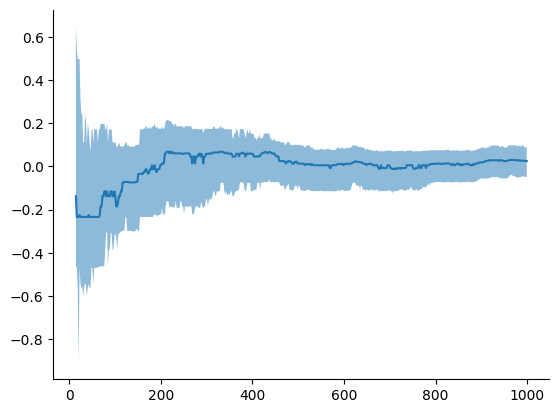

In [28]:
import numpy as np
import scipy.stats as stats
from relistats.quantile import confidence_interval_of_median

np.random.seed(42)
y = stats.norm.rvs(size=1000)

x_ax = range(15, len(y), 2)
upper = []
lower = []
central = []

cc = 0.95

for x in x_ax:
    y1 = sorted(y[:x])
    #print(y1)
    central.append(y1[(x-1)//2])
    ci = confidence_interval_of_median(cc, y1)
    lower.append(ci[0])
    upper.append(ci[1])

ax = plt.subplot(111)
ax.plot(x_ax, central)
ax.fill_between(x_ax, lower, upper, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

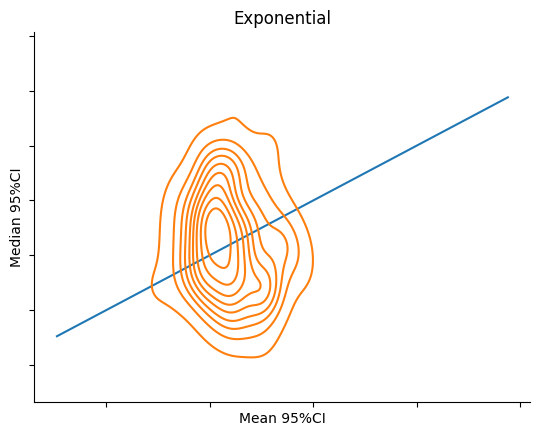

In [28]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
from relistats.quantile import confidence_interval_of_median
import seaborn as sns

def means_vs_medians(name, dist) -> None:
    n_iter = 100
    n_samples = 1000

    mean_ci = []
    median_ci = []

    for _ in range(n_iter):
        #y = stats.maxwell.rvs(size=1000)         
        #y = stats.triang(c=0).rvs(size=1000)
        #y = stats.rayleigh.rvs(size=1000)
        y = dist.rvs(size=n_samples)
        #y = stats.norm.rvs(size=n_samples)
        #y = stats.uniform.rvs(size=n_samples)

        median_95ci = confidence_interval_of_median(0.95, y)
        calc_mean = sum(y)/len(y)
        calc_stderr = np.std(y)/math.sqrt(len(y))
        mean_95ci_size = 2*1.96*calc_stderr
        median_95ci_size = median_95ci[1] - median_95ci[0]
        mean_ci.append(mean_95ci_size)
        median_ci.append(median_95ci_size)

    #plt.scatter(mean_ci, median_ci)
    max_mean = max(mean_ci)
    max_median = max(median_ci)
    max_max = max(max_mean, max_median)
    min_min = min(min(mean_ci), min(median_ci))
    sns.lineplot(x=[min_min, max_max], y=[min_min, max_max])
    ax = sns.kdeplot(x=mean_ci, y=median_ci)

    ax.spines[['right', 'top']].set_visible(False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.set_xlabel("Mean 95%CI")
    ax.set_ylabel("Median 95%CI")
    ax.set_title(name)

means_vs_medians("Exponential", stats.expon)

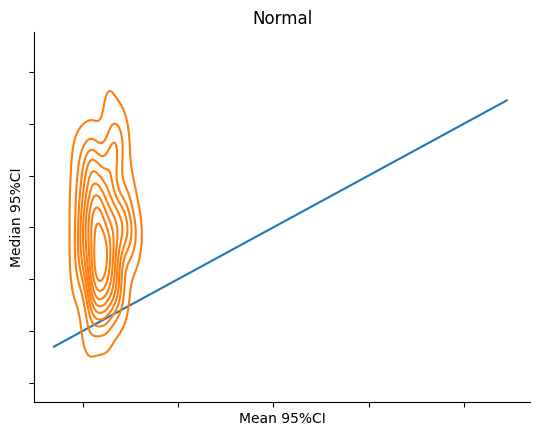

In [29]:
means_vs_medians("Normal", stats.norm)

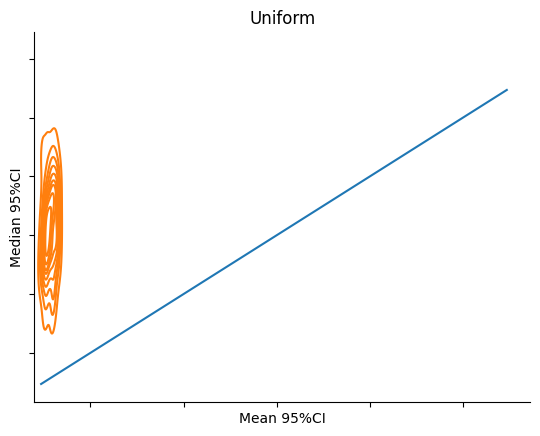

In [30]:
means_vs_medians("Uniform", stats.uniform)